In [1]:
import sys
sys.path.insert(0,'/home/djl34/lab_pd/aso/scripts')
from notebook_imports import *

/home/djl34/mambaforge/envs/raklette/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(


# Combine rate with disease annotation

In [8]:
filename = os.path.join(aso_data_dir, "genes_category/{type}/ad_rate/pergene_all.tsv").format(type = "ad_lof")

In [9]:
df = pd.read_csv(filename, sep = "\t")

In [10]:
df

,Gene,lof_probability,lof_severe,lof_moderate,probably_amenable,possibly_amenable_skipping
0,ENSG00000091483,0.000021,0.000019,0.0,0.000004,0.000000e+00
1,ENSG00000116539,0.000074,0.000064,0.0,0.000018,7.734147e-08
2,ENSG00000117118,0.000015,0.000013,0.0,0.000004,1.299194e-08
3,ENSG00000117394,0.000027,0.000024,0.0,0.000005,9.337949e-09
4,ENSG00000117713,0.000023,0.000018,0.0,0.000010,1.127653e-07
...,...,...,...,...,...,...
184,ENSG00000100354,0.000020,0.000013,0.0,0.000014,7.003397e-08
185,ENSG00000100393,0.000079,0.000073,0.0,0.000012,4.668934e-08
186,ENSG00000183765,0.000009,0.000007,0.0,0.000005,2.019839e-08
187,ENSG00000186575,0.000027,0.000021,0.0,0.000012,8.942032e-08


In [11]:
disease_filename = os.path.join(aso_data_dir, "genes_category/ad_lof/final_AD_set.tsv")
df_disease = pd.read_csv(disease_filename, sep = "\t")
df_disease = df_disease.drop(["Unnamed: 0", "probably_amenable", "possibly_amenable_gain", "possibly_amenable_skipping"], axis = 1)

In [12]:
df_disease = df_disease.merge(df, on = "Gene", how = "left")

In [13]:
df_disease.head()

,GENE SYMBOL,DISEASE LABEL,Needs ASO Therapy?,GCEP,Gene,Chromosome/scaffold name,Symptoms,Link,Life Expectancy,Source.1,Link.1,Cancer,Clinical Trials,Status,Additional Comments,lof_probability,lof_severe,lof_moderate,probably_amenable,possibly_amenable_skipping
0,ACVRL1,"telangiectasia, hereditary hemorrhagic, type 2",Yes,Hemostasis Thrombosis,ENSG00000139567,12.0,The most common clinical manifestation is spon...,https://www.ncbi.nlm.nih.gov/gtr/conditions/C1...,"77.9 years, 95% CI 4.5-81.3 years",NIH,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN,NaN,NaN,NaN,0.000024,0.000021,0.0,0.000006,3.044975e-09
1,ADNP,ADNP-related multiple congenital anomalies - i...,NaN,Intellectual Disability and Autism,ENSG00000101126,20.0,ADNP syndrome is a condition that causes a wid...,https://www.ncbi.nlm.nih.gov/medgen/862975#:~:...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000006,0.000004,0.0,0.000004,0.000000e+00
2,AHDC1,AHDC1-related intellectual disability - obstru...,Yes,Intellectual Disability and Autism,ENSG00000126705,1.0,"The main features of Xia-Gibbs syndrome (XGS),...",https://www.ncbi.nlm.nih.gov/gtr/conditions/C4...,It is unknown whether life span in Xia-Gibbs ...,NIH,https://www.ncbi.nlm.nih.gov/books/NBK575793/#...,NaN,NaN,NaN,NaN,0.000007,0.000004,0.0,0.000007,0.000000e+00
3,ANK2,complex neurodevelopmental disorder,NaN,Intellectual Disability and Autism,ENSG00000145362,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000084,0.000071,0.0,0.000025,3.907639e-08
4,ANKRD11,KBG syndrome,Yes,Intellectual Disability and Autism,ENSG00000167522,16.0,KBG syndrome is a rare condition characterised...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,Normal,NIH paper on KBG syndrome,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN,NaN,NaN,NaN,0.000034,0.000018,0.0,0.000032,4.658696e-08


In [36]:
# df_disease.to_csv(os.path.join(aso_data_dir, "genes_category/ad_lof/AD_annotations.tsv"), index = None, sep = "\t")

# Look at top 10 genes

In [62]:
filename = os.path.join(aso_data_dir, "genes_category/ad_lof/AD_annotations_prevalence.tsv")
df_prevalence = pd.read_csv(filename, sep = "\t")
df_prevalence = df_prevalence[~df_prevalence["Known Prevalence of Disease (Upper)"].isna()]

In [63]:
df_prevalence["Known Prevalence of Disease (Upper)"]=pd.eval(df_prevalence["Known Prevalence of Disease (Upper)"])
df_prevalence["Known Prevalence of Disease (Lower)"]=pd.eval(df_prevalence["Known Prevalence of Disease (Lower)"])
df_prevalence = df_prevalence.drop(["GENE SYMBOL"], axis = 1)

In [64]:
len(df_prevalence)

34

In [65]:
df_prevalence = df_prevalence.merge(df_disease, on = "DISEASE LABEL"	, how = "left")

In [66]:
df_prevalence["lambda_upper"] = df_prevalence["Known Prevalence of Disease (Upper)"]/df_prevalence["lof_probability"]
df_prevalence["lambda_lower"] = df_prevalence["Known Prevalence of Disease (Lower)"]/df_prevalence["lof_probability"]

In [67]:
df_prevalence["log(lambda_upper)"] = np.log10(df_prevalence["lambda_upper"])
df_prevalence["log(lambda_lower)"] = np.log10(df_prevalence["lambda_lower"])

In [68]:
print(df_prevalence["Known Prevalence of Disease (Upper)"].sum()/df_prevalence["lof_probability"].sum())
print(df_prevalence["Known Prevalence of Disease (Lower)"].sum()/df_prevalence["lof_probability"].sum())

3.919611557100656
2.291976822349898


In [69]:
from scipy.stats import gmean
print(gmean(df_prevalence["lambda_upper"]))
print(gmean(df_prevalence["lambda_lower"]))


1.2467563522778926
0.8601218385293726


Text(0.5, 0, '$log(\\frac{Prevalence_{Estimated}^{Upper}}{Prevalence_{Predicted}})$')

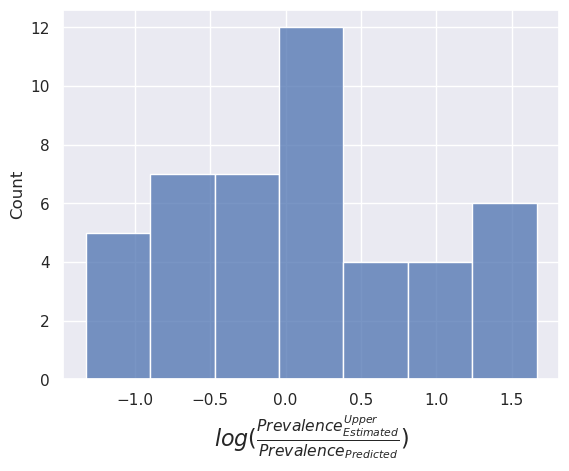

In [99]:
sns.set_theme(style="darkgrid")

g = sns.histplot(data=df_prevalence, x="log(lambda_upper)")
g.set_xlabel(r'$log(\frac{Prevalence_{Estimated}^{Upper}}{Prevalence_{Predicted}})$', fontsize=16)


Text(0.5, 0, '$log(\\frac{Prevalence_{Estimated}^{Lower}}{Prevalence_{Predicted}})$')

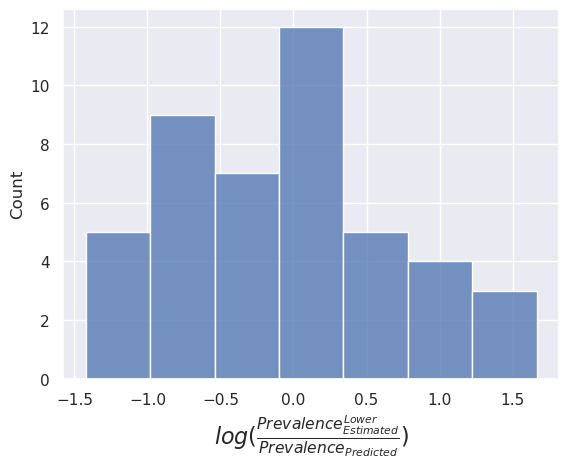

In [98]:
sns.set_theme(style="darkgrid")

g = sns.histplot(data=df_prevalence, x="log(lambda_lower)")
g.set_xlabel(r'$log(\frac{Prevalence_{Estimated}^{Lower}}{Prevalence_{Predicted}})$', fontsize=16)


# Look at some genes

In [63]:
df_gene_variants = pd.read_csv("/home/djl34/lab_pd/aso/data/genes_category/ad_lof/gene_variants/15/ENSG00000166147.tsv", sep = "\t")

In [65]:
df_gene_variants[df_gene_variants["lof_moderate"]]

,Chrom,Pos,Allele_ref,Allele,Consequence,Gene,Feature,CANONICAL,MaxEntScan_alt,MaxEntScan_diff,MaxEntScan_ref,mu,LaBranchoR_score,LaBranchoR_distance,REVEL,AF,CLNDN,CLNDISDB,CLNSIG,CLNSIGCONF,GENEINFO,LoF,canonical_splice_site,spliceAI_loss_pass,spliceAI_gain_pass,MaxEntScan_alt_low,splice_destroying_severe,LaBranchoR_close,splice_destroying_moderate,misplicing_gain,exon_skipping,exon_skipping_rate,common_variant_.1%,common_variant_1%,clinvar_benign,protein_coding_severe,protein_coding_severe_missense,lof_severe,lof_moderate,probably_amenable,possibly_amenable_gain,possibly_amenable_skipping
29969,15,48613094,T,C,splice_acceptor_variant,ENSG00000166147,ENST00000316623,YES,3.768,7.955,11.722,0.083,NaN,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,HC,True,True,True,False,False,True,True,False,True,0.999972,False,False,False,False,False,False,True,False,False,True
85026,15,48613093,C,G,splice_acceptor_variant,ENSG00000166147,ENST00000316623,YES,3.658,8.064,11.722,0.051,NaN,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,HC,True,True,True,False,False,True,True,False,True,0.999972,False,False,False,False,False,False,True,False,False,True
180746,15,48420685,G,T,splice_donor_variant,ENSG00000166147,ENST00000316623,YES,2.288,0.429,2.717,0.041,NaN,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,HC,True,True,False,False,False,True,True,False,True,0.999972,False,False,False,False,False,False,True,False,False,True
201503,15,48441719,A,C,splice_donor_variant,ENSG00000166147,ENST00000316623,YES,3.351,7.647,10.998,0.030,NaN,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,HC,True,True,False,False,False,True,True,False,True,0.999972,False,False,False,False,False,False,True,False,False,True
212565,15,48520819,T,C,splice_acceptor_variant,ENSG00000166147,ENST00000316623,YES,3.538,7.955,11.492,0.105,NaN,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,HC,True,True,True,False,False,True,True,False,True,0.999972,False,False,False,False,False,False,True,False,False,True
247632,15,48444661,C,G,splice_acceptor_variant,ENSG00000166147,ENST00000316623,YES,5.363,8.064,13.427,0.062,NaN,0,NaN,0.0,Marfan_syndrome|Familial_thoracic_aortic_aneur...,"MONDO:MONDO:0007947,MedGen:C0024796,OMIM:15470...",Pathogenic,.,FBN1:2200,HC,True,True,True,False,False,True,True,False,True,0.999972,False,False,False,False,False,False,True,False,False,True
285854,15,48537810,T,C,splice_acceptor_variant,ENSG00000166147,ENST00000316623,YES,3.437,7.955,11.392,0.117,NaN,0,NaN,0.0,Marfan_Syndrome/Loeys-Dietz_Syndrome/Familial_...,"MedGen:CN229799|MONDO:MONDO:0007947,MedGen:C00...",Pathogenic/Likely_pathogenic,.,FBN1:2200,HC,True,True,True,False,False,True,True,False,True,0.999972,False,False,False,False,False,False,True,False,False,True
466037,15,48444661,C,T,splice_acceptor_variant,ENSG00000166147,ENST00000316623,YES,4.677,8.750,13.427,0.073,NaN,0,NaN,0.0,Familial_thoracic_aortic_aneurysm_and_aortic_d...,"MONDO:MONDO:0019625,MedGen:C4707243,OMIM:PS607...",Pathogenic,.,FBN1:2200,HC,True,True,True,False,False,True,True,False,True,0.999972,False,False,False,False,False,False,True,False,False,True
498206,15,48444661,C,A,splice_acceptor_variant,ENSG00000166147,ENST00000316623,YES,4.829,8.598,13.427,0.051,NaN,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,HC,True,True,True,False,False,True,True,False,True,0.999972,False,False,False,False,False,False,True,False,False,True
584823,15,48444662,T,A,splice_acceptor_variant,ENSG00000166147,ENST00000316623,YES,5.060,8.367,13.427,0.013,NaN,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,HC,True,True,True,False,False,True,True,False,True,0.999972,False,False,False,False,False,False,True,False,False,True
